## Machine Learning and Image Classification

Image classification: task of assigning a label to an image from a pre-defined set of categories OR analyze the input image and return a label that categorizes the image.<br>

for examples, categories = { cat, cow, dog, hosrse, wolf } <br>

Task is to figure out how to accurately classify the contents of the image ( W x H x 3 = N pixels ) <br>

The sematic gap is the difference between a how human perceives the contents of an image versus how an image can be represented in a computer.<br>

How computer can understand or encode the image ? <br>
Using **Image Descriptors** and **Deep Learning**.<br>

<br>
Challenges: <br>
View point, Scale variation, Deformation, Occlusions, Background clutter, Intra-class variation, 

## Types of Learning

**Supervised Learning**<br>
Predictions are made on the input data and corrected when the predictions are wrong.<br>
For examples, Logistic Regression, Support Vector Machines, and Random Forests. <br>


**Unsupervised Learning** <br>
it has no labels with the input data and cannot correct the model if makes an in correct prediction. Most learning methods are focussed on deducing strcuture present in the input data.<br>
using **K**-means algorithms to automatically cluster the images.
Examples, Principal Component Analysis(PCA) for dimensionality reduction, used in face indentification in the Eigenfaces algorithms. <br>


** Semi-supervised Learning** <br>
Some of the labels associated with data and no labels for the other. 

## Image Classification Steps

1. Structuring intial dataset: Label the data <br>
2. Splitting the dataset into two parts: split into *training* used to learn category on the input data and correct when predictions are wrong And testing set used to evaluate its performance; Use K-Nearest Neighbor classifier.<br>
<br>
3. Extracting features: Using Image descriptor;<br>
4. Train Classification model: Train the classifir using SVM,decision Tress and Random Forest classifiers.<br>
5. Evaluation Classifier: Predict the label of image is. <br>



## K-Nearest Neighbor Classification

This is simple and works good for low dimension features spaces ( still overcome this problem using Approximate Nearest Neighbor ANN algorithms such as kd-trees, FLANN and random projections).<br>
Not suitable for distances in high-dimensional feature spaces.

In [15]:
# K-NN uses the euclidean distance or L2-distance;
#

from __future__ import print_function
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure
import numpy as np
import imutils
import cv2
import sklearn


# if older versions of sklearn

if int((sklearn.__version__).split(".")[1]) < 18:
    from sklearn.cross_validation import train_test_split
# use at lease version 0.18
else:
    from sklearn.model_selection import train_test_split
    
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# load the data set
mnist = datasets.load_digits()

In [21]:
# construct the training and testing data split using 75% and 25%;

(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(mnist.data), mnist.target, test_size=0.5, random_state=50)

#(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(mnist.data), mnist.target, test_size=0.25, random_state=42)

# test 10% training data and use it for validation
(trainData, valData, trainLabels, valLabels) = train_test_split( trainData, trainLabels, test_size=0.50, random_state=50)

# show the sizes of each data split
print("training data points: {}".format(len(trainLabels)))
print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(testLabels)))

training data points: 449
validation data points: 449
testing data points: 899


In [22]:

#initialize the values of k for KNN with l value
kVals = range(1,30,2)
accurancies = []

# loop over varies k values
for k in range(1, 30, 2 ):
    # train the K-NN classifier with K values
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trainData, trainLabels)
    
    #evaulate the model and update accurancies list;
    score = model.score(valData, valLabels)
    print("k={}, accuracy={}".format(k, score * 100 ))
    accurancies.append(score)
    
# find the value of k that has largest accurancy
i = int(np.argmax(accurancies))
print("k={} achieved highest accuracy of {} on validation data".format(kVals[i], accurancies[i] * 100 ))

k=1, accuracy=96.21380846325167
k=3, accuracy=96.88195991091314
k=5, accuracy=97.32739420935413
k=7, accuracy=96.21380846325167
k=9, accuracy=95.99109131403118
k=11, accuracy=95.7683741648107
k=13, accuracy=95.99109131403118
k=15, accuracy=94.43207126948775
k=17, accuracy=94.43207126948775
k=19, accuracy=93.98663697104676
k=21, accuracy=94.20935412026726
k=23, accuracy=93.76391982182628
k=25, accuracy=92.65033407572383
k=27, accuracy=92.20489977728286
k=29, accuracy=91.31403118040089
k=5 achieved highest accuracy of 97.32739420935413 on validation data


In [11]:
#Observation: use k=1 to train and evalute classifier data;

model = KNeighborsClassifier(n_neighbors=kVals[i])
model.fit( trainData, trainLabels)
predictions = model.predict(testData)

#show a final classification report demonstrating the accuracy of the classifier for each digits
print("EVALUATION ON TESTING DATA")
print( classification_report(testLabels, predictions ))


EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        43
          1       0.95      1.00      0.97        37
          2       1.00      1.00      1.00        38
          3       0.98      0.98      0.98        46
          4       0.98      0.98      0.98        55
          5       0.98      1.00      0.99        59
          6       1.00      1.00      1.00        45
          7       1.00      0.98      0.99        41
          8       0.97      0.95      0.96        38
          9       0.96      0.94      0.95        48

avg / total       0.98      0.98      0.98       450



**Observation**: 0,2,6, and 7 are classified 100% and digit 1 obtains the lowest classification accurancy of 95%.<br>
In real-time examples, need to extract features vectors from each digit rather than raw pixel intensities of the image and Euclid distance between raw pixels intensities lead to high accuracy classifiers.

I think the digit is:2
I think the digit is:5
I think the digit is:0
I think the digit is:6
I think the digit is:5


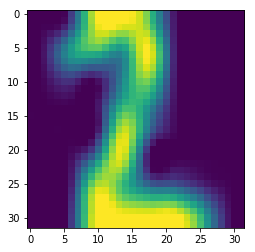

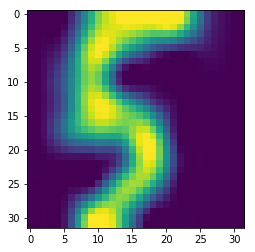

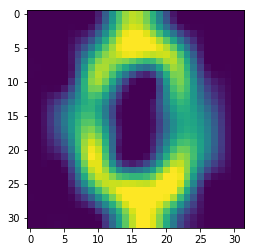

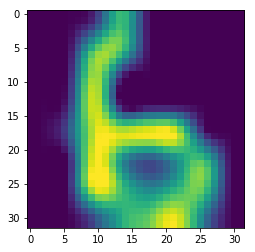

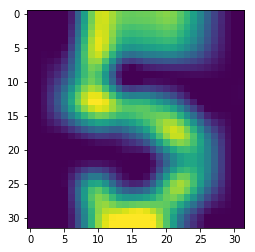

In [16]:

#loop over the few random digits
for i in list(map(int, np.random.randint(0, high=len(testLabels), size=(5,)))):
    # grab the image and classify it
    image = testData[i]
    prediction = model.predict(image.reshape(1,-1))[0]
    
    #convert image of 64-dim to an 8x8 image compatible with opencv, resize it to 32x32 pixels
    image = image.reshape((8, 8)).astype("uint8")
    image = exposure.rescale_intensity(image, out_range=(0,255))
    image = imutils.resize(image, width=32, inter=cv2.INTER_CUBIC )
    # show the prediction
    print("I think the digit is:{}".format(prediction))
    plt.figure()
    plt.imshow(image)
    